In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model,model_from_json

In [2]:

train_image = []

for i in range(8):
    print('now we are in the folder C',i)
    imgs = os.listdir("../statefarm_dataset/train/c"+str(i))
    for j in range(500):
        img_name = "../statefarm_dataset/train/c"+str(i)+"/"+imgs[j]
        img = cv2.imread(img_name)
        img = cv2.resize(img,(224,224))
        label = i
        train_image.append([img,label])
#         plt.imshow(img)

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7


In [3]:
import random
random.shuffle(train_image)

In [4]:

X_test = []
y_test = []


for features,labels in train_image:
        X_test.append(features)
        y_test.append(labels)


print (len(X_test),len(y_test))

4000 4000


In [5]:

with open('models/mobilenetv2_1.4_moreaugs.json','r') as f:
    model = model_from_json(f.read())

model.load_weights('models/mobilenetv2_1.4_moreaugs_2.hdf5')

sgd = optimizers.SGD(lr = 0.005) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [6]:
predict_test = np.array(X_test).reshape(-1,224,224,3).astype('float32')
prediction = model.predict(predict_test)
print(prediction[0])

tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }



[2.1577360e-04 9.9953234e-01 1.0351459e-06 2.0015186e-04 8.7309418e-06
 3.8256997e-07 3.0666721e-05 1.0988412e-05]


In [7]:
# labels is the image array
i = 0
# fig, ax = plt.subplots(20, 1, figsize = (100,100))
yhat_classes = []
for i in range(len(X_test)):
#     ax[i].imshow(X_test[i])
    predicted_class = np.argmax(prediction[i])
    yhat_classes.append(predicted_class)
    classes = 'C' + str(predicted_class)
#     ax[i].set_title(tags[predicted_class])
#     plt.show

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
print(len(yhat_classes))

accuracy = accuracy_score(y_test, yhat_classes)
precision = precision_score(y_test, yhat_classes,average='weighted')
recall = recall_score(y_test, yhat_classes,average='weighted')
matrix = confusion_matrix(y_test, yhat_classes)


print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("Confusion matrix: ")
print(matrix)

4000
Accuracy:  0.875
Precision:  0.8993764385719273
Recall:  0.875
Confusion matrix: 
[[454   4   0   2   4   0   6  30]
 [  6 438   0  21   1   1  24   9]
 [  1   0 427   0   5   0  45  22]
 [ 24   0   0 450   1   0   8  17]
 [ 25   0   0   4 409   0  22  40]
 [ 23   0   0   3   2 349  17 106]
 [  0   0   2   0   0   0 479  19]
 [  1   0   0   0   0   4   1 494]]


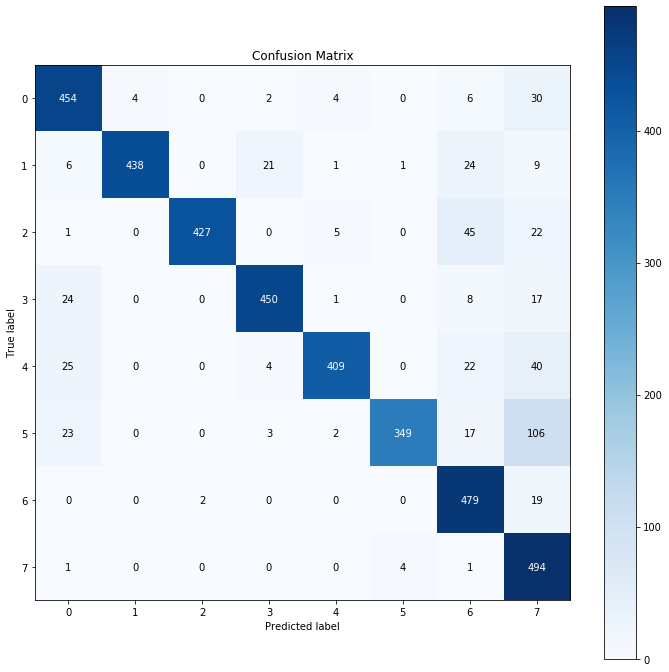

In [17]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    yhat_classes,
    figsize=(12,12))

In [16]:
!pip install -q scikit-plot